In [40]:
import numpy as np
import time

def jacobi(A, b, x0, tol, nmax):
    M, N = A.shape
    L = len(x0)

    if M != N:
      print("La matrice A non è una matrice quadrata")
      return None, None, None, None
    elif L != M:
        print("Le dimensioni della matrice A non corrispondono alla dimensione della soluzione iniziale x0")
        return None, None, None, None
    if np.any(np.diag(A) == 0):
        print("Almeno un elemento della diagonale è zero. Il metodo fallisce automaticamente")
        return None, None, None, None

    # Extract needed matrices
    D = np.diag(np.diag(A))
    B = D - A

    xold = np.copy(x0)
    xnew = xold + 1  # Ensure initial difference is large
    nit = 0

    start_time = time.time()
    while np.linalg.norm(xnew - xold, np.inf) > tol and nit < nmax:
        xold = np.copy(xnew)
        xnew = np.linalg.inv(D) @ (B @ xold + b)
        nit += 1
    elapsed_time = time.time() - start_time

    err = np.linalg.norm(xnew - xold, np.inf)
    return xnew, nit, elapsed_time, err

In [41]:
def gauss_seidel(A, b, x0, tol, nmax):
    M, N = A.shape
    L = len(x0)

    if M != N:
        print("Matrix A is not a square matrix")
        return None, None, None, None
    elif L != M:
        print("Dimensions of matrix A do not match dimension of initial guess x0")
        return None, None, None, None

    # Extract needed matrices
    L = np.tril(A)
    B = A - L

    xold = np.copy(x0)
    xnew = xold + 1  # Ensure initial difference is large
    nit = 0

    start_time = time.time()
    while np.linalg.norm(xnew - xold, np.inf) > tol and nit < nmax:
        xold = np.copy(xnew)
        xnew = np.linalg.solve(L, b - B @ xold)
        nit += 1
    elapsed_time = time.time() - start_time

    err = np.linalg.norm(xnew - xold, np.inf)
    return xnew, nit, elapsed_time, err

In [42]:
if __name__ == "__main__":
    n = 10
    A = np.diag(3 * np.ones(n))
    A = A - np.diag(np.ones(n-1), -1) - np.diag(np.ones(n-1), 1)#matrice a dominanza triangolare
    b = np.ones(n)

    tol = 1e-10
    nmax = 100
    x0 = np.random.rand(n)

    x_Jac, nit_Jac, time_Jac, err_Jac = jacobi(A, b, x0, tol, nmax)
    x_GSe, nit_GSe, time_GSe, err_GSe = gauss_seidel(A, b, x0, tol, nmax)

    print("Jacobi Method Error:", err_Jac)
    print("Gauss-Seidel Method Error:", err_GSe)

Jacobi Method Error: 9.319922611439324e-11
Gauss-Seidel Method Error: 6.970901633707172e-11


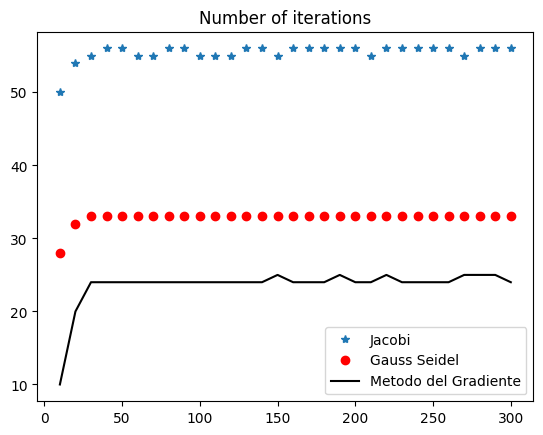

In [43]:
import matplotlib.pyplot as plt

def metodo_gradiente(A, b, x0, tol, nmax):
    x = np.copy(x0)
    r = b - A @ x
    p = np.copy(r)
    nit = 0

    start_time = time.time()
    for _ in range(nmax):
        alpha = (r.T @ r) / (p.T @ (A @ p))
        x_new = x + alpha * p
        if np.linalg.norm(x_new - x, np.inf) < tol:
            break
        r_new = r - alpha * (A @ p)
        beta = (r_new.T @ r_new) / (r.T @ r)
        p = r_new + beta * p
        x, r = x_new, r_new
        nit += 1
    elapsed_time = time.time() - start_time

    err = np.linalg.norm(r, np.inf)
    return x, nit, elapsed_time, err

if __name__ == "__main__":
    N = 300
    nit_Jac_vect = {}
    time_Jac_vect = {}
    err_Jac_vect = {}
    nit_GSe_vect = {}
    time_GSe_vect = {}
    err_GSe_vect = {}
    nit_mg_vect = {}
    time_mg_vect = {}
    err_mg_vect = {}

    for n in range(10, N+1, 10):
        A = np.diag(3 * np.ones(n)) - np.diag(np.ones(n-1), -1) - np.diag(np.ones(n-1), 1)
        b = np.ones(n)
        x0 = np.random.rand(n)

        tol = 1e-10
        nmax = 100

        x_Jac, nit_Jac, time_Jac, err_Jac = jacobi(A, b, x0, tol, nmax)
        x_GSe, nit_GSe, time_GSe, err_GSe = gauss_seidel(A, b, x0, tol, nmax)
        x_mg, nit_mg, time_mg, err_mg = metodo_gradiente(A, b, x0, tol, nmax)

        nit_Jac_vect[n] = nit_Jac
        time_Jac_vect[n] = time_Jac
        err_Jac_vect[n] = err_Jac
        nit_GSe_vect[n] = nit_GSe
        time_GSe_vect[n] = time_GSe
        err_GSe_vect[n] = err_GSe
        nit_mg_vect[n] = nit_mg
        time_mg_vect[n] = time_mg
        err_mg_vect[n] = err_mg

    sizes = list(range(10, N+1, 10))

    plt.figure()
    plt.plot(sizes, [nit_Jac_vect[n] for n in sizes], '*', label='Jacobi')
    plt.plot(sizes, [nit_GSe_vect[n] for n in sizes], 'ro', label='Gauss Seidel')
    plt.plot(sizes, [nit_mg_vect[n] for n in sizes], 'k', label='Metodo del Gradiente')
    plt.title('Numero diiterazioni')
    plt.legend(loc='lower right')
    plt.show()

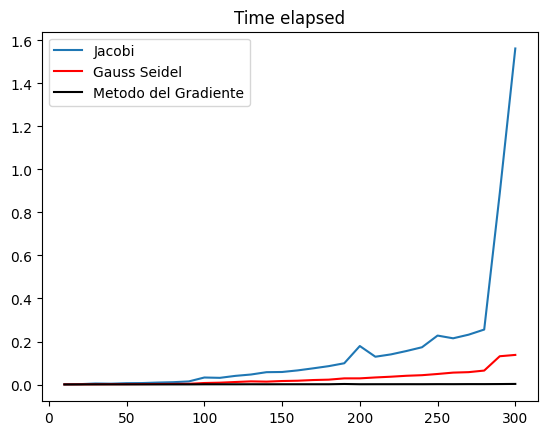

In [44]:
    plt.figure()
    plt.plot(sizes, [time_Jac_vect[n] for n in sizes], label='Jacobi')
    plt.plot(sizes, [time_GSe_vect[n] for n in sizes], 'r', label='Gauss Seidel')
    plt.plot(sizes, [time_mg_vect[n] for n in sizes], 'k', label='Metodo del Gradiente')
    plt.title('Tempo trascorso')
    plt.legend(loc='upper left')
    plt.show()

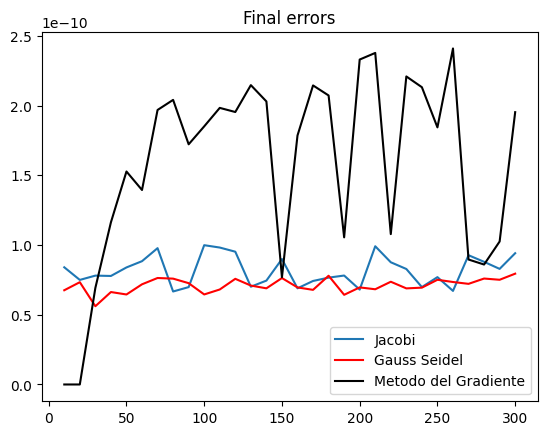

In [45]:
    plt.figure()
    plt.plot(sizes, [err_Jac_vect[n] for n in sizes], label='Jacobi')
    plt.plot(sizes, [err_GSe_vect[n] for n in sizes], 'r', label='Gauss Seidel')
    plt.plot(sizes, [err_mg_vect[n] for n in sizes], 'k', label='Metodo del Gradiente')
    plt.title('Errore finale')
    plt.legend(loc='lower right')
    plt.show()